# Analyser bøker med en familie ordsekker
Denne kan du bruke hvis du allerede har noen temaer ('topics').

In [1]:
import json
import sqlite3
import pandas as pd

import dhlab.nbtext as nb
import matplotlib.pyplot as plt

import dhlab.module_update as mu
mu.update('mods_meta')
mu.update('wordbank')
import mods_meta as mm

from dhlab.nbtokenizer import tokenize
from wordbank import word_paradigm_many

Updated file `/home/larsm/my_projects/dhlab_hackaton_test/mods_meta.py`

Updated file `/home/larsm/my_projects/dhlab_hackaton_test/wordbank.py`

In [2]:
def declensions(wordbagfamily, pos = None):
    """Set pos to subst, verb or adj for limiting the inflectional forms"""
    if isinstance(pos, list):
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2] if infl_set [1] in pos])) for key in wordbagfamily}
    elif isinstance( pos, str):
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2] if infl_set [1] == pos])) for key in wordbagfamily}
    else:
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2]])) for key in wordbagfamily}
    return res

# Lag temafamilien 

Her legger du inn temaene dine ("familier" med ordsekker), først tittel du gir dem ("label"), deretter temaordene. 

In [3]:
topics = {
    'vehicles_': "kjøretøy biler bil moped motorsykkel".split(),
    'collective_': "fly tog buss trikk kollektivtransport lastebiler".split(),
    'roads_': "vei gate motorvei grusvei fortau".split(),
    'traffic_': "trafikk rushtid trafikk-kaos påsketrafikk".split(),
    'soft_': "fotgjengere gående sykkel sykling".split(),
}

Fyll opp med bøyde former, for vi er interesserte i å få treff på forskjellige bøyninger av ordene også. 

Hvis du får feilmelding når du kjører denne, prøv simpelthen å kjøre den på nytt. 

In [4]:
fullform_topics = declensions(topics, pos=['subs','verb'])

In [13]:
fullform_topics

{'vehicles_': ['biler',
  'motorsykler',
  'kjøretøyer',
  'bilene',
  'mopeder',
  'bilt',
  'bilte',
  'motorsykkel',
  'moped',
  'bile',
  'kjøretøy',
  'bila',
  'biles',
  'bilen',
  'motorsykkelen',
  'kjøretøyene',
  'mopedene',
  'kjøretøya',
  'mopeden',
  'motorsyklene',
  'kjøretøyet',
  'bil'],
 'collective_': ['trikkene',
  'trikken',
  'toget',
  'busser',
  'fly',
  'busse',
  'flyene',
  'flyr',
  'lastebil',
  'busses',
  'fløyet',
  'lastebilene',
  'togene',
  'fløy',
  'lastebiler',
  'trikke',
  'buss',
  'flaug',
  'bussene',
  'bussen',
  'flya',
  'toga',
  'trikka',
  'flydd',
  'tog',
  'flys',
  'trikk',
  'flyen',
  'trikker',
  'flyer',
  'bussa',
  'toges',
  'trikket',
  'flyet',
  'trikkes',
  'toge',
  'toger',
  'lastebilen',
  'busset'],
 'roads_': ['vei',
  'veiet',
  'gatene',
  'motorveiene',
  'gaten',
  'gater',
  'grusveien',
  'grusveiene',
  'veid',
  'grusveier',
  'veide',
  'veiene',
  'veies',
  'fortauer',
  'fortaua',
  'veie',
  'gate'

# Definer et korpus ved å sample bøker med metadata

### Her finner du Dewey-koder: https://deweysearchno.pansoft.de/webdeweysearch/mainClasses.html

In [5]:
korpus = {yearstart: nb.book_corpus(ddk = '839%', limit = 10000, period = (yearstart, yearstart + 10)) for yearstart in range(1960, 2010, 10)}

# Ta en titt på korpus

In [12]:
korpus[1970].head(5)

,urn,author,title,year
0,2013041805068,"Sundby, Dag",Sensommer,1976
1,2015042008070,,Ord om Aasmund Brynildsen til hans minne,1975
2,2014051907013,"Vesaas, Tarjei",Noveller i samling,1977
3,2016061508016,,Modern Nordic plays,1974
4,2013041105073,"Lindgren, Barbro",Bladene brenner,1976


# Forberedelser for å analysere distribusjonen av temaene i korpuset

In [7]:
korpus_eval = {year: nb.wordbag_eval(fullform_topics, list(korpus[year].urn)) for year in korpus}

/home/larsm/my_projects/dhlab_hackaton_test/.venv/lib/python3.9/site-packages/dhlab/legacy/nbtext.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s)
/home/larsm/my_projects/dhlab_hackaton_test/.venv/lib/python3.9/site-packages/dhlab/legacy/nbtext.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s)
/home/larsm/my_projects/dhlab_hackaton_test/.venv/lib/python3.9/site-packages/dhlab/legacy/nbtext.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s)
/home/larsm/my_projects/dhlab_hackaton_test/.venv/lib/python3.9/site-packages/dhlab/legacy/nbtext.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [18]:
korpus[1970].urn

0       2013041805068
1       2015042008070
2       2014051907013
3       2016061508016
4       2013041105073
            ...      
5364    2015021108135
5365    2014072206096
5366    2016031148052
5367    2014020306016
5368    2013012907115
Name: urn, Length: 5369, dtype: int64

In [8]:
def plotfig(a_plot, font_size=18):
    fsize = plt.rcParams["font.size"]
    plt.rcParams["font.size"] = font_size
    
    ax = a_plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    
    return

In [9]:
pd.set_option('max_rows', None)

OptionError: 'Pattern matched multiple keys'

In [10]:
df = nb.frame_sort(korpus_eval[1970],'soft_').head(20)
prefix = 'https://urn.nb.no/URN:NBN:no-nb_digibok_'
df['url'] = '<a href ='+ prefix + df.index + '>' + df.index + '</a>'
df.style

,collective_,roads_,soft_,vehicles_,traffic_,snitt,url
2010081920002,15.000000,213.000000,1893.000000,15.000000,2.000000,427.600000,2010081920002
2013040507082,137.000000,472.000000,1386.000000,87.000000,3.000000,417.000000,2013040507082
2013041806043,201.000000,273.000000,1232.000000,151.000000,5.000000,372.400000,2013041806043
2014030506077,39.000000,294.000000,993.000000,43.000000,14.000000,276.600000,2014030506077
2012111406225,44.000000,266.000000,990.000000,59.000000,1.000000,272.000000,2012111406225
2013102407127,19.000000,13.000000,982.000000,0.000000,0.000000,202.800000,2013102407127
2012022908046,48.000000,215.000000,963.000000,110.000000,2.000000,267.600000,2012022908046
2013082605099,18.000000,190.000000,960.000000,3.000000,0.000000,234.200000,2013082605099
2012092108115,10.000000,199.000000,948.000000,15.000000,0.000000,234.400000,2012092108115
2016091648060,47.000000,139.000000,917.000000,13.000000,3.000000,223.800000,2016091648060


# Visualiser fordelingen tiår for tiår

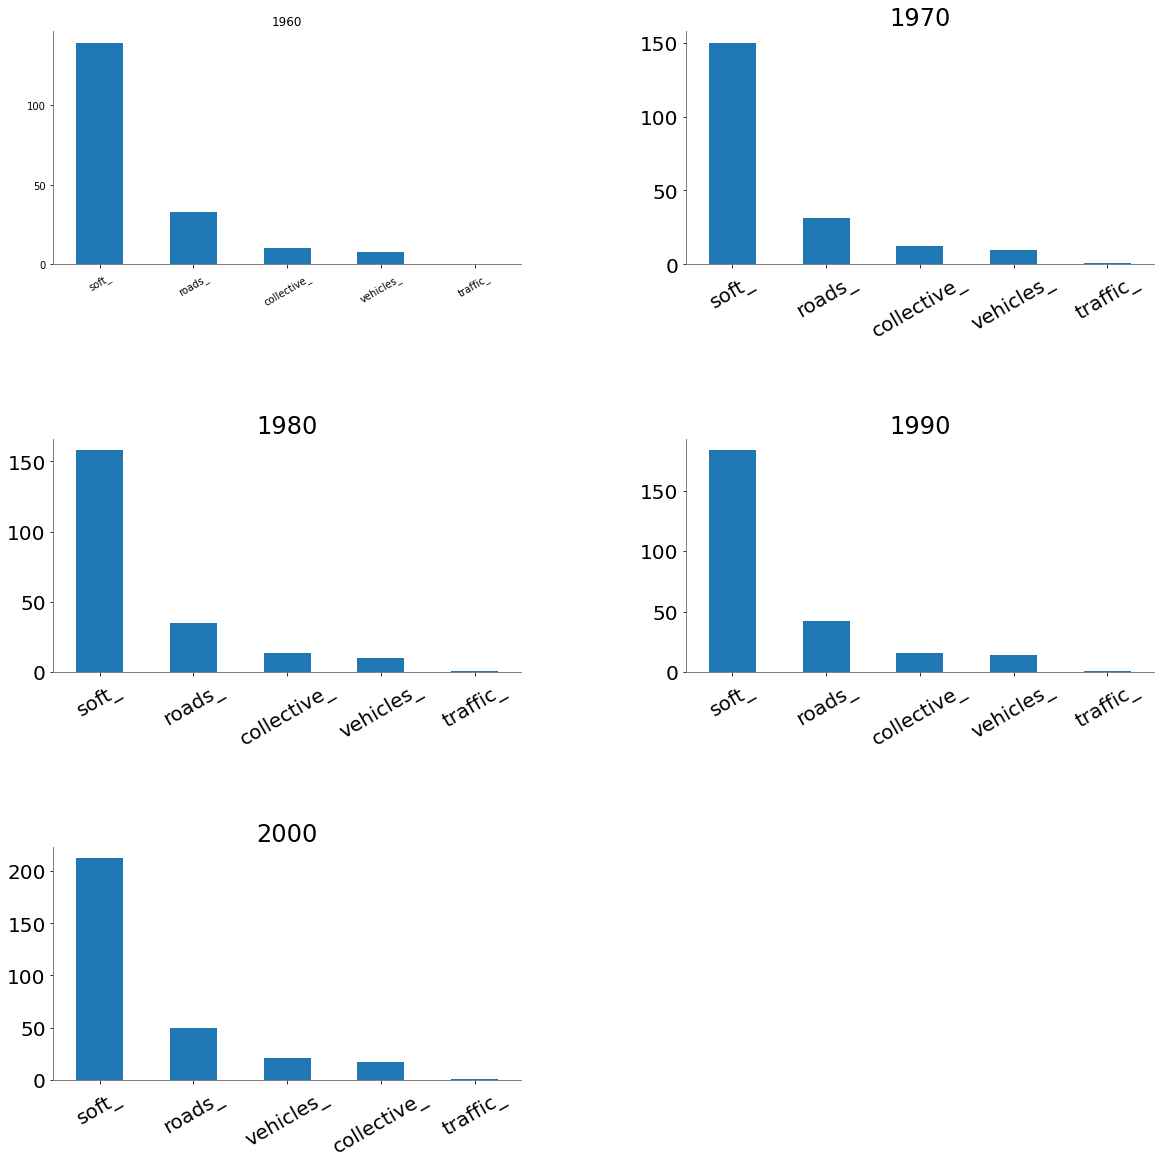

In [11]:
for i,y in enumerate(korpus_eval):
    num = 321 + i
    plt.subplot(num)
    plotfig(korpus_eval[y].mean()[list(topics.keys())].sort_values(ascending=False).plot(kind='bar', rot=30, figsize=(18,8), title=str(y)), font_size = 20) 
plt.subplots_adjust(top=1.90, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.35)